# Wine Classification Project
Adriana Nuncio, Mack McGlenn

Codeup: O'neil Cohort

### Project Overview
_____________________________________________________________________________________
This project is designed to identify key drivers in scoring wine quality and predict wine score accuracy for red and white variants of the Portuguese "Vinho Verde" wine.

**Objectives**

- Document code, process (data acquistion, preparation, exploratory data analysis and statistical testing, modeling, and model evaluation), findings, and key takeaways in a Jupyter notebook final report.

- Create modules (wrangle.py) that make your process repeateable and your report (notebook) easier to read and follow.

- Ask exploratory questions of your data that will help you understand more about the attributes and drivers of home value. Answer questions through charts and statistical tests.

- Construct a classification model to predict wine scores with greater accuracy than the baseline.



**Deliverables**

- a complete readme.md which walks through the details of the project
- a final report (.ipynb) which concisely displays the finished version of the project
- wrangle.py file to hold all data acquisition, preparation, testing, and modeling functions
- exploratory workbook showing the unpolished groundwork and insights that lead to the final notebook

In [1]:
#Imports
import os

import numpy as np
import pandas as pd
import wrangle_w as wr

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits import mplot3d

from scipy import stats
from scipy.stats import pearsonr, spearmanr, mannwhitneyu

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, RFE, f_regression
from sklearn.linear_model import LinearRegression, TweedieRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

#### Acquire

In [2]:
white = pd.read_csv('https://query.data.world/s/6ao5pdvepveo2qeeafwdfia6bl5mou?dws=00000')
red = pd.read_csv('https://query.data.world/s/azffrkwaoqlfrd3srbnuwjp24hvlj4?dws=00000')

In [3]:
df = wr.acquire_wine()

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
df.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

#### Prepare

In [6]:
wine = wr.prep_wine(df)

In [7]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_bins,type_red,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low_quality,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low_quality,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low_quality,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mid_quality,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low_quality,1,0


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  type                  6497 non-null   object  
 13  quality_bins          6497 non-null   category
 14  type_red              6497 non-null   uint8   
 15  type

In [9]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


In [10]:
#Check for missing values in df
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
quality_bins            0
type_red                0
type_white              0
dtype: int64

Notes:
   - Keeping any outliers in this df because they could be useful in detecting anomalies within our wine scoring process
    
   - All dtypes are floats except for quality, so I'll convert that to a float as well
   - Added new column that accounts for wine type, then generated dummies for both
   - Added new column that categorizes quality into 3 tiers: low, mid, and high qualities

#### Split

In [11]:
train, val, test = wr.split_wine(wine, 'quality')

In [12]:
train.shape, val.shape, test.shape

((3637, 16), (1560, 16), (1300, 16))

#### Scale

The next step is to scale the data. Scaling helps to normalize the data and makes it easier to be used in machine learning algorithms as it brings all the data points to the same level. A MinMax scaler specifically scales data to values between 0 and 1. We'll apply a MinMax scaler to all three split datasets.

In [13]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
count,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000
mean,7.206736,0.338880,0.317979,5.420126,0.055235,30.456833,116.221611,0.994644,3.219205,0.530129,10.504291,5.818532,0.238658,0.761342
std,1.309803,0.164699,0.142207,4.676374,0.033756,17.846840,56.515891,0.002980,0.160200,0.152035,1.207888,0.873808,0.426322,0.426322
min,3.800000,0.080000,0.000000,0.700000,0.009000,1.000000,6.000000,0.987130,2.740000,0.230000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,79.000000,0.992240,3.110000,0.430000,9.500000,5.000000,0.000000,1.000000
50%,6.900000,0.290000,0.310000,3.100000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.400000,6.000000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.000000,0.063000,41.000000,156.000000,0.996900,3.320000,0.600000,11.300000,6.000000,0.000000,1.000000
max,15.900000,1.580000,1.000000,31.600000,0.611000,289.000000,440.000000,1.010300,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


In [14]:
train_sc, val_sc, test_sc = wr.split_scaled(train, val, test)

In [15]:
type(train_sc)

pandas.core.frame.DataFrame

In [16]:
train_sc.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
2099,0.280992,0.133333,0.54,0.517799,0.059801,0.184028,0.447005,0.512300,0.267717,0.146893,0.217391,6,0,1
3941,0.322314,0.213333,0.27,0.122977,0.041528,0.090278,0.205069,0.199396,0.370079,0.203390,0.623188,8,0,1


In [17]:
val_sc.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
8,0.330579,0.333333,0.02,0.042071,0.106312,0.027778,0.027650,0.41735,0.488189,0.19209,0.217391,7,1,0
1014,0.347107,0.333333,0.16,0.042071,0.184385,0.006944,0.002304,0.31981,0.377953,0.19774,0.463768,6,1,0


In [18]:
test_sc.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
6021,0.198347,0.093333,0.28,0.048544,0.051495,0.079861,0.274194,0.197238,0.354331,0.141243,0.362319,6,0,1
3835,0.272727,0.133333,0.19,0.229773,0.051495,0.163194,0.410138,0.373759,0.330709,0.152542,0.202899,5,0,1


In [19]:
X_train, X_val, X_test = train_sc.drop(columns= 'quality'), val_sc.drop(columns='quality'), test_sc.drop(columns='quality')
y_train, y_val, y_test = train['quality'], val['quality'], test['quality']

In [20]:
y_train = pd.DataFrame(y_train)
y_val= pd.DataFrame(y_val)
y_test= pd.DataFrame(y_test)

### Exploratory Analysis

We'll first take a look at the correlation between wine quality and other features. This will help us identify how impactful a feature is on guaging wine quality.

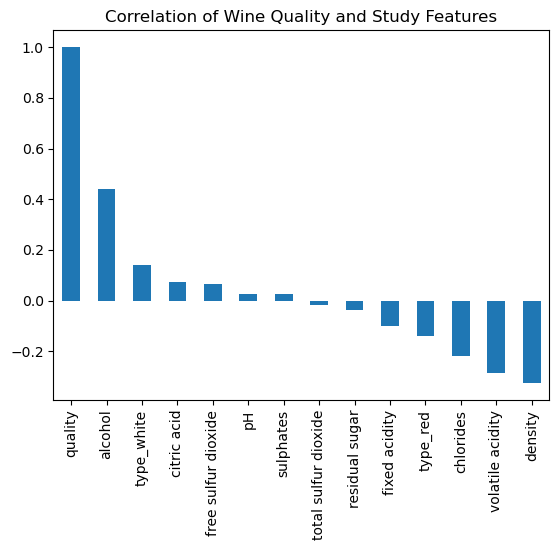

In [21]:
train.corr()['quality'].sort_values(ascending= False).plot(kind = 'bar')
plt.title('Correlation of Wine Quality and Study Features')
plt.show()

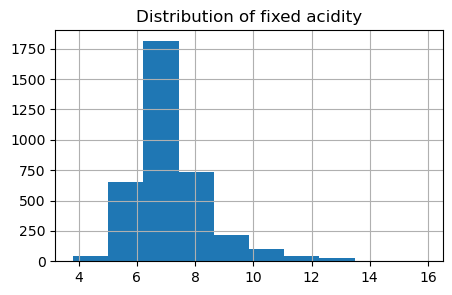

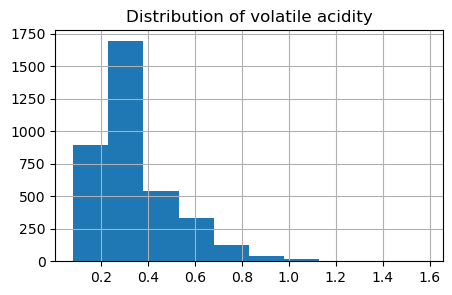

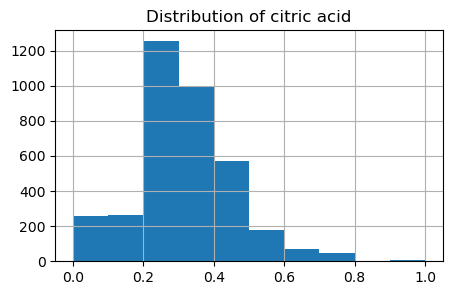

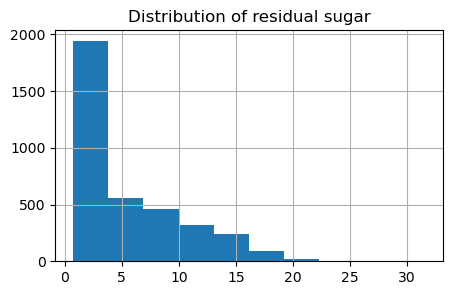

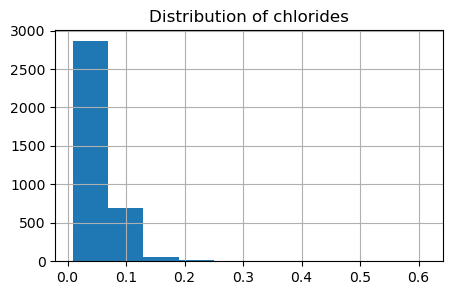

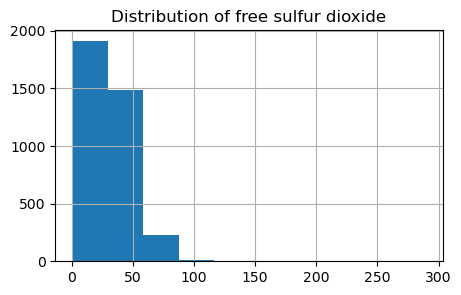

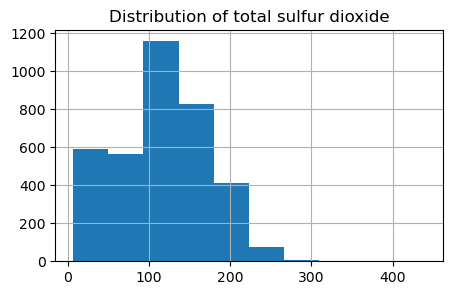

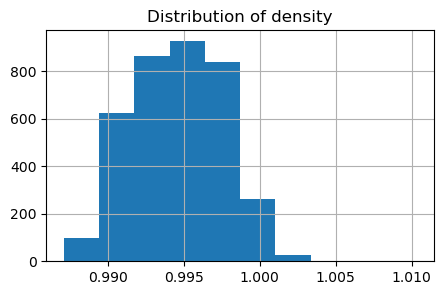

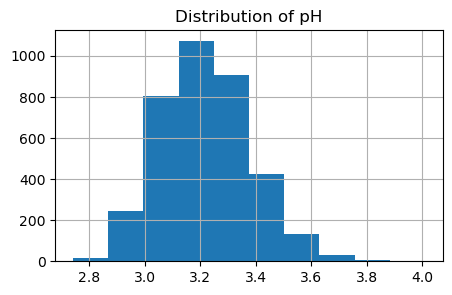

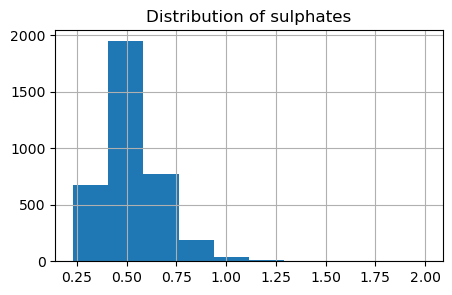

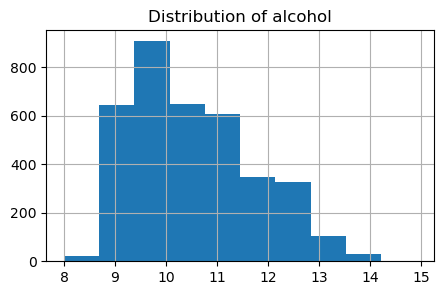

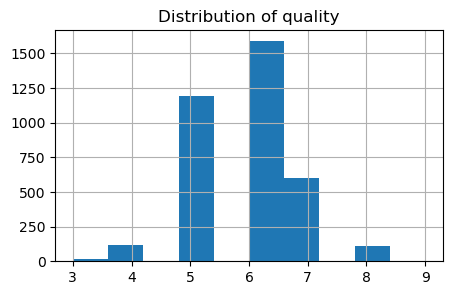

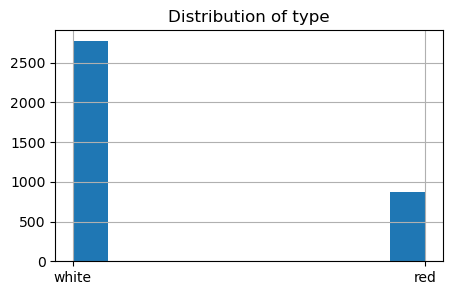

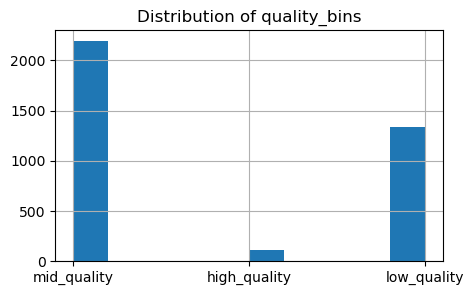

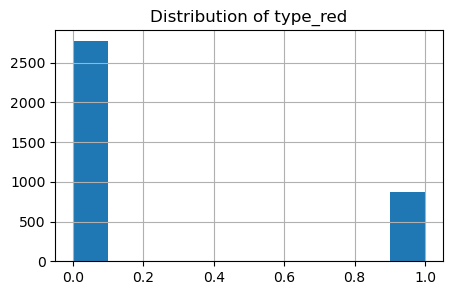

In [22]:
# Distribution of Wine Features
for col in train.columns[:-1]:
    plt.figure(figsize= (5,3))
    train[col].hist()
    plt.title(f'Distribution of {col}')
    plt.show()

### Statistical Analysis

One thing I'm interested in exploring is how our wine qualities and features might differ between two types of wines. Before we formulate our hypotheses, let's take a look at how our features for each type correlates to quality.

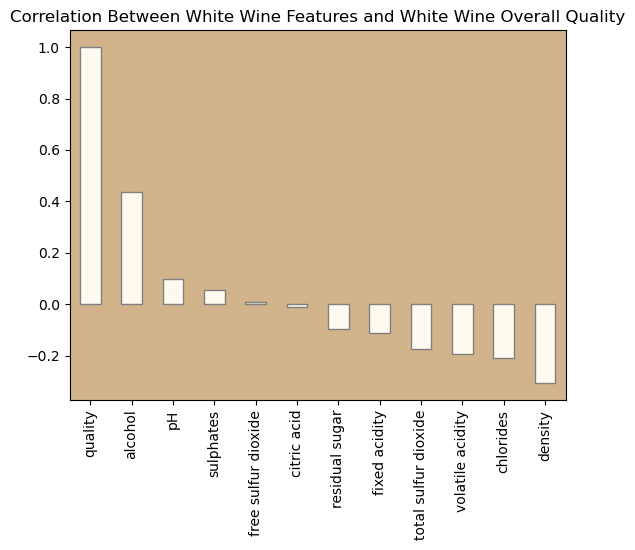

In [23]:
ax = plt.axes()
ax.set_facecolor("tan")
white.corr()['quality'].sort_values(ascending= False).plot(kind = 'bar', color='floralwhite', ec='grey')
plt.title('Correlation Between White Wine Features and White Wine Overall Quality')
plt.show()

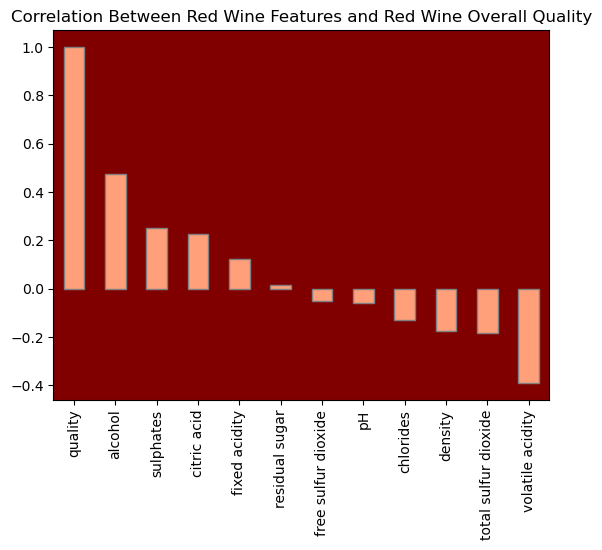

In [24]:
ax = plt.axes()
ax.set_facecolor("maroon")
red.corr()['quality'].sort_values(ascending= False).plot(kind = 'bar', color='lightsalmon', ec='grey')
plt.title('Correlation Between Red Wine Features and Red Wine Overall Quality')
plt.show()

#### Statistical Analysis Questions

1. Are higher sulphates more important in determining quality of red wine than in white wine?
2. Do higher quality wines contain more alcohol than mid-quality or low quality wines?
1. Does the quality of a wine's score correlate with whether the wine is a red or a white?


#### Question 1: Sulphates in Reds vs. Whites
Are higher sulphates more important in determining quality of red wine than in white wine?

**Null hypothesis:** Higher sulphates are no more important in determining quality of red wine than in white wine

**Hypothesis:** Higher sulphates are more important in determining quality of red wine than in white wine

#### Chart 1 

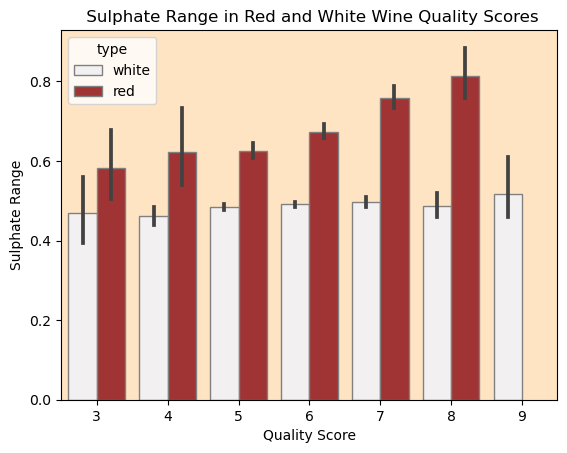

In [25]:
wr.sulphates_redwhite(train)

In [26]:
# Using mann-Whitney's test to compare the means of two independent samples
a = 0.05
t, p = mannwhitneyu(train.quality, train.sulphates)
if p < a:
    print(f'P-value: {p}')
    print('We reject the null hypothesis')

P-value: 0.0
We reject the null hypothesis


#### Question 2: Alcohol and Wine Quality
Do higher quality wines contain more alcohol than mid-quality or low quality wines?

**Null hypothesis:** Higher quality wines contain less alcohol than lower or mid-quality wines

**Hypothesis:** Higher quality wines contain more alcohol than lower or mid-quality wines



#### Chart 1

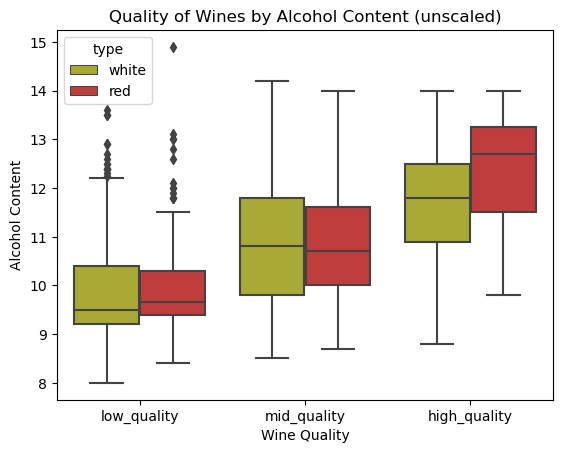

In [27]:
sb.boxplot(data = train, x='quality_bins', y='alcohol', hue='type', palette=["C18", "C3"])
plt.title('Quality of Wines by Alcohol Content (unscaled)')
plt.ylabel('Alcohol Content')
plt.xlabel('Wine Quality')
plt.show()

Based on our visualization, it appears that higher quality wines have a higher average alcohol content than low quality wines, and a slightly higher alcohol content than mid-quality wines.
A statistical analysis is still necessary to understand the relationship with more confidence, but first, we'll take a look at whether clustering the data reveals any significant insights.

#### Clustering

#### Question 2 Table 1

This function allows us to look at how our alcohol vs quality relationship is calculated with multiple values for n_clusters. There's a shift in the data starting around 5 clusters.

In [28]:
alc_qual_clus = wr.change_clusters(train_sc, 'alcohol', 'quality')

In [29]:
alc_qual_clus

,n_clusters,inertia
0,2,1029.088863
1,3,359.449805
2,4,202.920080
3,5,103.908240
4,6,73.398611
5,7,58.489138
6,8,46.206218
7,9,34.607454


#### Question 2 Chart 1

This chart uses 3 clusters and their respective centroids. According to the inertia table above, 3 clusters isn't the most significant number of clusters to measure, but this gives a quick visual of how that data might be visualized. Next, we'll look at visualizations for multiple n_cluster values as well as an elbow table to see where the inertia significance starts to shift.

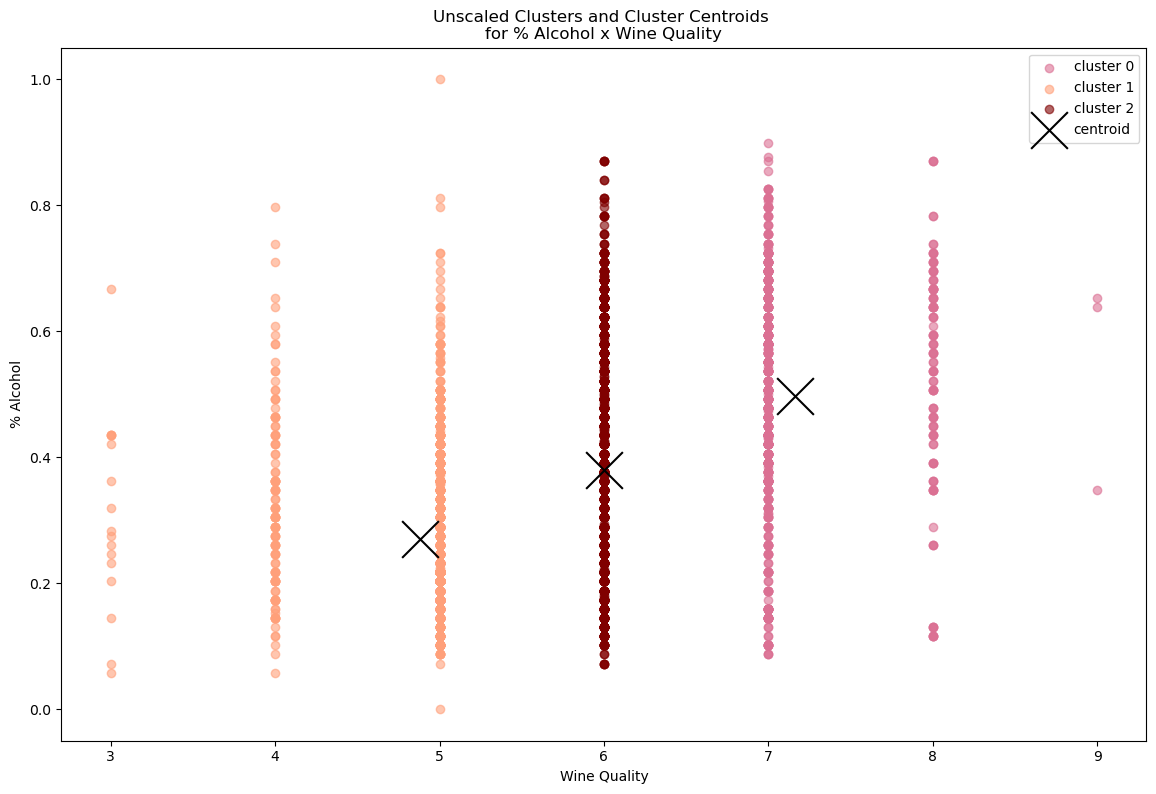

In [30]:
wr.centroid_cluster(train_sc)

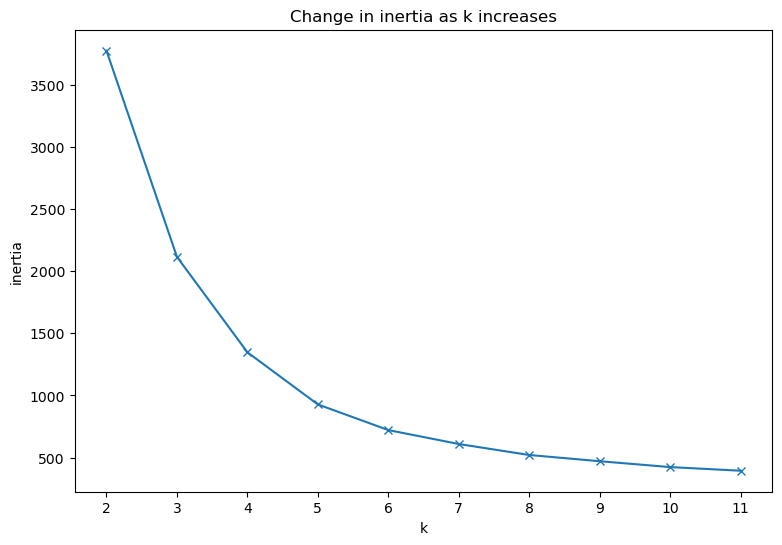

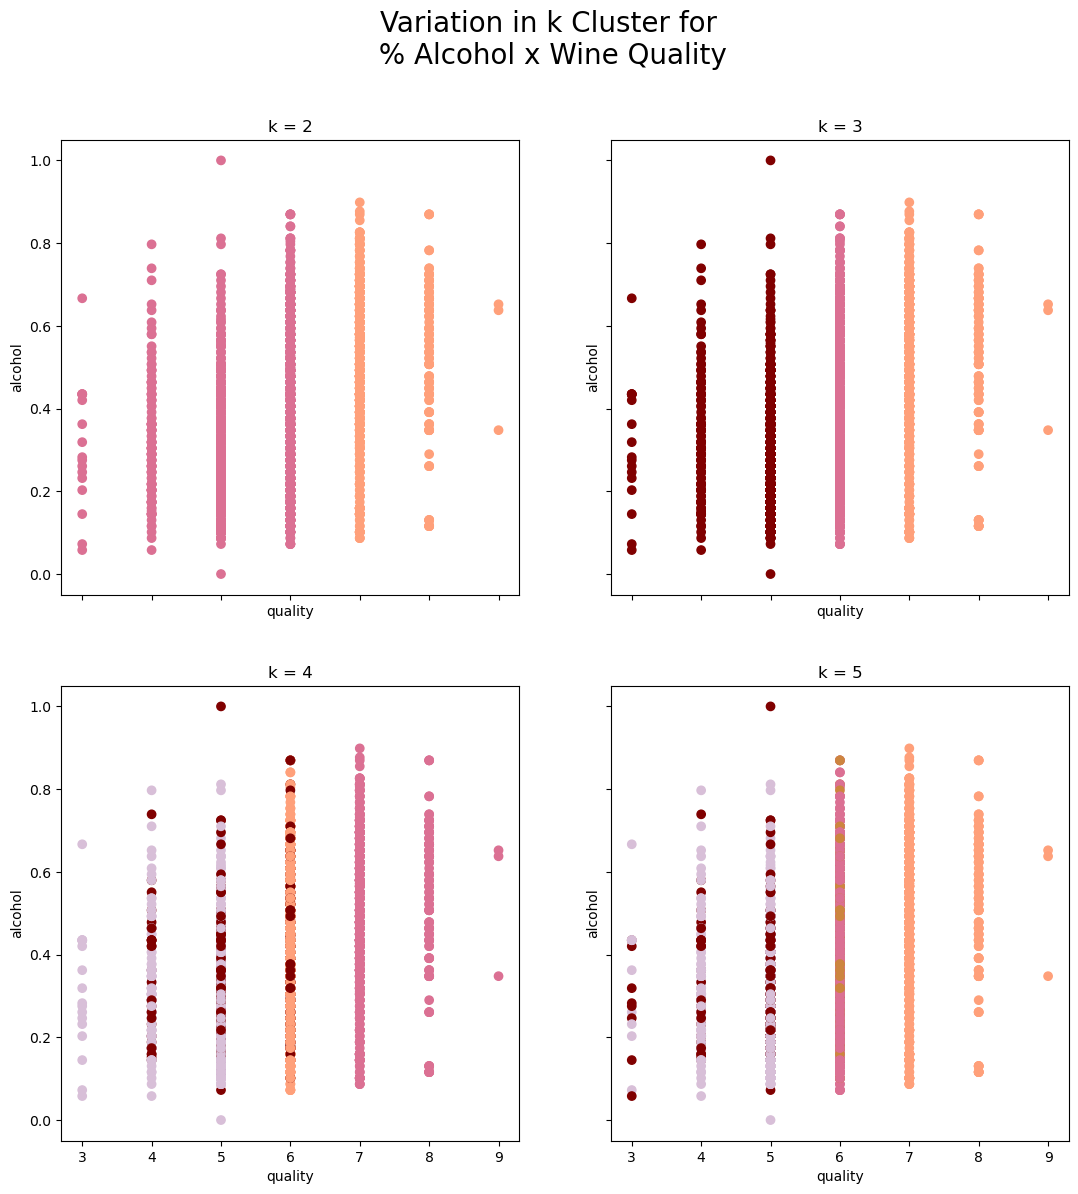

In [31]:
wr.inertia_change(train_sc)

Our cluster variations aren't revealing significant information across different cluster amounts. Although it may not be significant to the question we're trying to answer here, it's still valuable to explore the relationship.

#### Question 2 Statistical Analysis

We calculated the correlation between wine quality and alcohol using Pearson's R, and returned a correlation of .44 .
Next, we performed a t-test to determine if there is a significant difference in quality between wines with high and low alcohol content. 

Finally, an ANOVA shows if there is a significant difference in quality between wines grouped by alcohol content.

In [32]:
wr.stats_q2(train)

Correlation coefficient: 0.439
P-value: 0.000
T-statistic: 25.516
P-value: 0.000
F-statistic: 268.322
P-value: 0.000


### MODELING

Time to move on to modeling. We decided to go with classification modeling; after trying both classification and regression, it returned the most significant results. The means used to find our models are Decision Tree, KNearest Neighbors, and RandomForest. 

In [33]:
# Baseline for Classification
baseline_pred = y_train.mode()
baseline_acc = round((y_train ==6.0).mean(),2)

print(f'Baseline Prediction: {baseline_pred}')
print(f'Baseline Accuracy: {baseline_acc}')

Baseline Prediction:    quality
0        6
Baseline Accuracy: quality    0.44
dtype: float64


In [34]:
dtscores =wr.dt__comp_train_test(X_train, y_train, X_val, y_val)

In [35]:
dtscores

,max_depth,train_accuracy,val_accuracy,Percentage Difference
0,{1},0.513335,0.492949,2.04
1,{2},0.537531,0.523718,1.38
2,{3},0.551828,0.526923,2.49
3,{4},0.560352,0.531410,2.89
4,{5},0.578774,0.537179,4.16
5,{6},0.605994,0.539103,6.69
6,{7},0.634039,0.530128,10.39
7,{8},0.664559,0.528205,13.64
8,{9},0.707176,0.533974,17.32
9,{10},0.759692,0.544872,21.48


**Notes**

None of these validation accuracy scores aren't fantastic, but they all beat our baseline accuracy of 44%
our best model (model with least variance between train and validate sets) is the decision tree model with a max depth of 6

In [36]:
dtmodel = wr.dtmodel(X_train, y_train, X_val, y_val)

In [37]:
dtmodel

,model,Train Accuracy,Validate Accuracy,Percentage Difference
0,DecisionTree(6),0.605994,0.539103,6.69


In [38]:
dtmodel2 = wr.dtmodel(X_train, y_train, X_val, y_val)

In [39]:
dtmodel2

,model,Train Accuracy,Validate Accuracy,Percentage Difference
0,DecisionTree(6),0.605994,0.539103,6.69


In [40]:
rf_multi = wr.rt_multi_val(X_train, y_train, X_val, y_val)

In [41]:
rf_multi

,max_depth,min_samples_leaf,Train Accuracy,Validate Accuracy,Percentage Difference
0,1,3,0.505362,0.487821,1.75
1,1,6,0.505362,0.487821,1.75
2,1,9,0.505362,0.487821,1.75
3,1,12,0.505362,0.487821,1.75
4,1,15,0.505362,0.487821,1.75
5,1,18,0.505362,0.487821,1.75
6,3,3,0.545779,0.526923,1.89
7,3,6,0.546054,0.526282,1.98
8,3,9,0.546329,0.527564,1.88
9,3,12,0.546054,0.527564,1.85


In [42]:
rfmodel = wr.rfmodel(X_train, y_train, X_val, y_val)

In [43]:
rfmodel

,model,Train Accuracy,Validate Accuracy,Percentage Difference
0,RandomForest,0.546879,0.527564,1.93


**Notes**

our random forest model with the best performance has a max depth of 3 and min_samples_leaf of 15. There is 1.93% variance between our train accuracy of 54.7% and our validation accuracy of 52.8%

In [44]:
wr.knn_multi_val(X_train, y_train, X_val, y_val)

,n_neighbors,Train Accuracy,Validate Accuracy,Percentage Difference
0,5,0.691504,0.543590,14.79
1,6,0.667583,0.548718,11.89
2,7,0.667033,0.556410,11.06
3,8,0.650811,0.555128,9.57
4,9,0.640638,0.560256,8.04
5,10,0.629915,0.553846,7.61
6,11,0.621941,0.551282,7.07
7,12,0.621391,0.557051,6.43
8,13,0.613693,0.554487,5.92
9,14,0.608194,0.560897,4.73


In [45]:
knnmodel = wr.knn_model(X_train, y_train, X_val, y_val)

In [46]:
knnmodel

,model,Train Accuracy,Validate Accuracy,Percentage Difference
0,KNN,0.594721,0.552564,4.22


,Model,Train Accuracy,Validation Accuracy,Difference
0,Baseline Accuracy,0.440000,N/A,N/A
1,Decision Tree(6),0.605994,0.539103,6.69
2,Decision Tree(4),0.560352,0.53141,2.89
3,Random Forest,0.546879,0.527564,1.93
4,KNearest,0.594721,0.552564,4.22


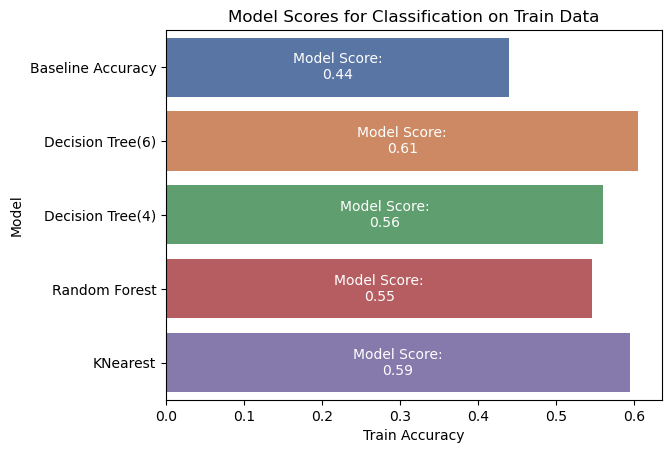

In [47]:
wr.americasnexttopmodel(X_train, y_train, X_val, y_val)

**Notes**

The overall best performing model algorithm was Decision Tree with a max depth of 6. 
It returned an accuracy score of .61 on our train data, and an accuracy score of .54, both of which outperform our baseline accuracy score. It was also the model with the 2nd lowest difference between the train and validation accuracy scores. Using this model, which is based on all of our X_train features, we can predict wine quality with over 10% higher accuracy.